<a href="https://colab.research.google.com/github/GauthamRajgopal/Natural-Language-Processing/blob/master/Twittersentimentalanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem Definition

Given Tweets Data, The task is to deterine whether a tweet contains positive,Negative, Neutral sentiments

As we are aiming to analyse the sentiment analysis, Hence this is a Twitter Sentimental Analysis

Sentimental Analysis is a process of determine whether a piece of writing is positive, negative or Neutral, Also refered to as opinion mining

Steps involved in Twitter Sentimental Analysis

1.Import necessary files required

2.Import & Visualize Twets data (Label charts,Observations Frequency chart, Observations Word cloud & Sentiement Distribution in Tweet data)

3.Data Preprocessing

4.Lexicon model

5.Vectorizing our data set using TF-IDF

6.Random forest model

7.Naive bayes model

8.Topic modeling

9.Model/Algorithm Comparison

**1.   Import necessary files required**

In [1]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
#Magic Command to print mulitple statements in single command 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [3]:
data=pd.read_excel('/content/Tweets_Infotainment_DashCam_15Oct2019.xlsx')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Tweets    207 non-null    object
 1   Category  207 non-null    object
dtypes: object(2)
memory usage: 3.4+ KB


In [4]:
print('Dataset size:',data.shape)
print('Columns are:',data.columns)

Dataset size: (207, 2)
Columns are: Index(['Tweets', 'Category'], dtype='object')


In [5]:
data.head()
print(len(data))

,Tweets,Category
0,Our Top Pick of The Best Parking Mode Dash Cam...,Positive
1,Still watching #Russian #dashcam compilations ...,Neutral
2,Check out this great travel dash cam for your ...,Positive
3,Shortcut! #trafficcircle #dashcam https://t.co...,Neutral
4,Our DMS alarms include:①Closed Eyes②Yawning③In...,Neutral


207


In [6]:
# examine the class distribution
data.Category.value_counts().sort_index()

Negative     21
Neutral      71
Positive    115
Name: Category, dtype: int64


**2.   Visualize Imported Data**



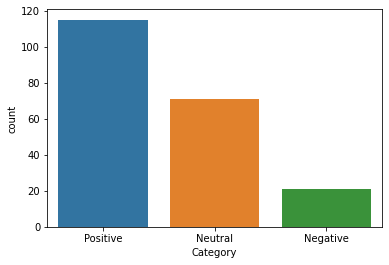

In [7]:
sns.countplot(x = 'Category', data = data)

In [8]:
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])

plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size 

6.0
4.0


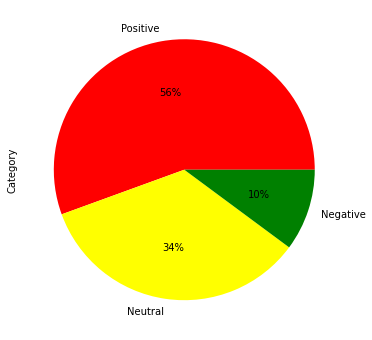

In [9]:
data.Category.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "yellow", "green"])                                                            

In [10]:
#tweets = data['Tweet']
#labels = data['Category']
#tweets.shape
tweets_text=data.drop(['Category'], axis=1)
tweets_text.head()
print(len(data))

,Tweets
0,Our Top Pick of The Best Parking Mode Dash Cam...
1,Still watching #Russian #dashcam compilations ...
2,Check out this great travel dash cam for your ...
3,Shortcut! #trafficcircle #dashcam https://t.co...
4,Our DMS alarms include:①Closed Eyes②Yawning③In...


207


**3.   Data Preprocessing**

In [11]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [0]:
processed_features = []

for sentence in range(0, len(tweets_text)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', data.Tweets[sentence])

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)

In [0]:
corpus = [] # form an empty list called corpus
ps = PorterStemmer() # for stemming the words to original form, for example - "running to run"
stop_words = set(stopwords.words('english')) # remove words such as will, I, and, at etc.
for i in range(0,len(tweets_text)): # iterate through the list of 1000 tweets
  # remove handles (@), numbers, urls, emojis and any other special characters to have only text
  tweets_text_cln = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|[0-9]", '',data.Tweets[i])
  # convert all words to lower case
  tweets_text_cln = tweets_text_cln.lower()
  # split sentences into words
  tweets_text_cln = tweets_text_cln.split()
  # remove English stop words
  tweets_text_cln = [x for x in tweets_text_cln if not x in stop_words]
  # stem words to the base form
  #tweets_text_cln = [ps.stem(x) for x in tweets_text_cln]
  # join words to form the original sentences
  tweets_text_cln = " ".join(tweets_text_cln)
  # append to the list to get all Tweets in one place
  corpus.append(tweets_text_cln)
#print(corpus) 

In [0]:
bagofwords=[]
for i in range (0,207):
    words = corpus[i].split()
    bagofwords.append(words)

In [15]:
bagofwords[0]

['top', 'pick', 'best', 'parking', 'mode', 'dash', 'cams', 'dashcam']

In [16]:
import itertools
import collections
all_words=list(itertools.chain(*bagofwords))
print(all_words[0:10])
print()
print('Most commonly occuring words and frequency\n')
words_freq=collections.Counter(all_words)
words_freq.most_common(20)

['top', 'pick', 'best', 'parking', 'mode', 'dash', 'cams', 'dashcam', 'still', 'watching']

Most commonly occuring words and frequency



[('dashcam', 117),
 ('dash', 71),
 ('cam', 58),
 ('great', 46),
 ('driving', 42),
 ('check', 40),
 ('travel', 39),
 ('journey', 38),
 ('ease', 35),
 ('worries', 30),
 ('car', 20),
 ('camera', 18),
 ('via', 15),
 ('p', 15),
 ('one', 12),
 ('driver', 12),
 ('video', 10),
 ('road', 10),
 ('footage', 10),
 ('new', 9)]

In [17]:
freq_word_df = pd.DataFrame(words_freq.most_common(20),columns=['words','Freq'])
freq_word_df.head()

,words,Freq
0,dashcam,117
1,dash,71
2,cam,58
3,great,46
4,driving,42


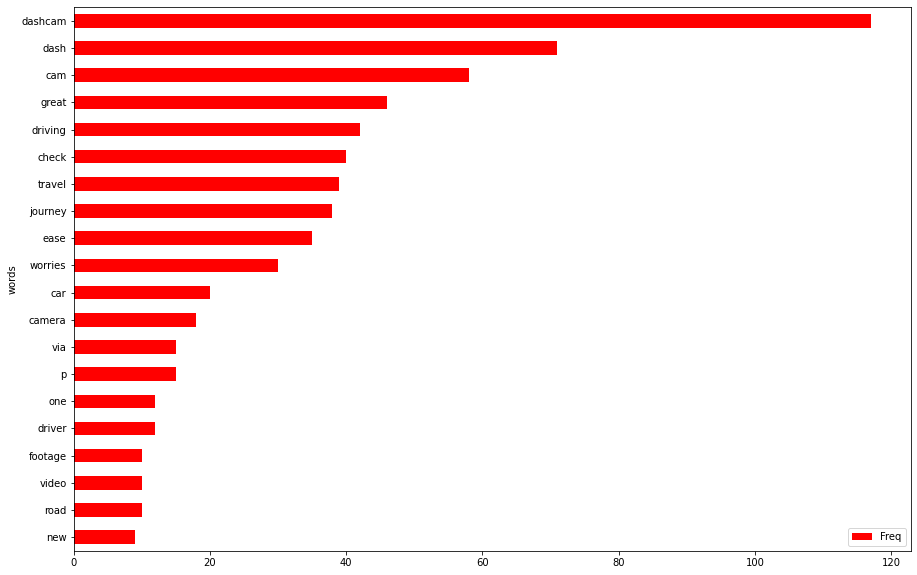

In [18]:
fig,ax=plt.subplots(figsize=(15,10))
freq_word_df.sort_values(by='Freq').plot.barh(x='words',y='Freq',ax=ax,color='red')
plt.show();

In [0]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
word_string=' '.join(freq_word_df.words)
wordcloud=WordCloud(#stopwords=STOPWORDS,
                       background_color='white',
                     max_words=20
                      ).generate(word_string)

<Figure size 1080x720 with 0 Axes>

(-0.5, 399.5, 199.5, -0.5)

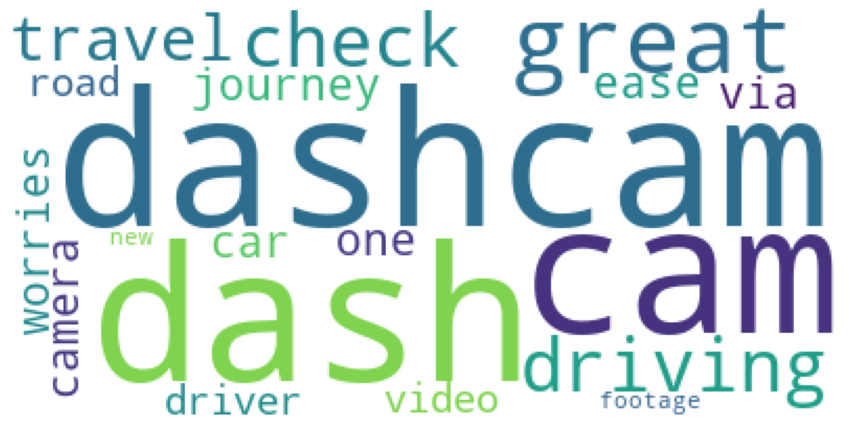

In [20]:
plt.figure(figsize=(15,10))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [21]:
from textblob import TextBlob
sentiment_text=[TextBlob(tweet) for tweet in corpus]
print(sentiment_text[0].polarity)
print(sentiment_text[0])

0.75
top pick best parking mode dash cams dashcam


In [22]:
sentiments = [[tweet.sentiment.polarity,str(tweet)] for tweet in sentiment_text]
sentiment_df = pd.DataFrame(sentiments, columns=['polarity','Tweet_Text'])
sentiment_df.sort_values(by='polarity',ascending=False)

,polarity,Tweet_Text
161,0.850,impressive quality recording dashcam dashcamer...
206,0.800,check great travel dash cam journey gstaad cra...
22,0.800,check great travel dash cam journey misawa tok...
153,0.800,check great travel dash cam journey durban gro...
25,0.800,drowsy distracted driving greatly increases ch...
...,...,...
50,-0.425,look dangerous uturn saw past wednesday missis...
107,-0.450,terrifying dashcam footage near miss car lorry...
137,-0.500,dashcam catches illegal alienarkansas man shoo...
69,-0.500,dashcam catches illegal alienarkansas man shoo...


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd5d7f14278>],
      dtype=object)

Text(0.5, 1.0, 'Sentiments Distribution in Tweet data')

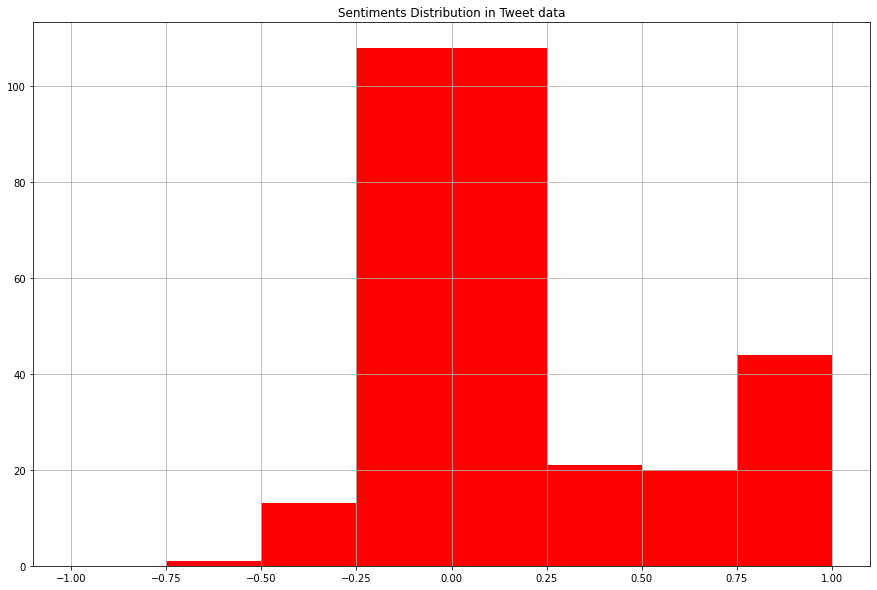

In [23]:
fig,ax = plt.subplots(figsize=(15,10))
sentiment_df.hist(bins=[-1,-0.75,-0.5,-0.25,0.25,0.5,0.75,1], ax=ax, color='red')
plt.title('Sentiments Distribution in Tweet data')
plt.show()



**4.   Lexicon Model**



In [0]:
lex_file = open("/content/AFINN-111.csv",encoding='cp1252')

In [0]:
#Strip the records and create a word list for each tweet
word_list = []
for record in (corpus):# for record in (tweets):
    #print(record)
    words = []
    tokens = record.split()
    #print(tokens)
    for token in tokens:
        words.append(token.lower())
    word_list.append(words)  
    
#word_list 

In [26]:
lexicons = {}
records = lex_file.readlines()
for record in records:
    #print(record) # line contains newline charecter
    #print(record.rstrip('\n').split(",")) - to remove new line charecter
    lexicons[record.rstrip('\n').split(",")[0]] = int(record.rstrip('\n').split(",")[1])
print(lexicons)
#lexicons["abandon"]

{'abandon': -2, 'abandoned': -2, 'abandons': -2, 'abducted': -2, 'abduction': -2, 'abductions': -2, 'abhor': -3, 'abhorred': -3, 'abhorrent': -3, 'abhors': -3, 'abilities': 2, 'ability': 2, 'aboard': 1, 'absentee': -1, 'absentees': -1, 'absolve': 2, 'absolved': 2, 'absolves': 2, 'absolving': 2, 'absorbed': 1, 'abuse': -3, 'abused': -3, 'abuses': -3, 'abusive': -3, 'accept': 1, 'accepted': 1, 'accepting': 1, 'accepts': 1, 'accident': -2, 'accidental': -2, 'accidentally': -2, 'accidents': -2, 'accomplish': 2, 'accomplished': 2, 'accomplishes': 2, 'accusation': -2, 'accusations': -2, 'accuse': -2, 'accused': -2, 'accuses': -2, 'accusing': -2, 'ache': -2, 'achievable': 1, 'aching': -2, 'acquit': 2, 'acquits': 2, 'acquitted': 2, 'acquitting': 2, 'acrimonious': -3, 'active': 1, 'adequate': 1, 'admire': 3, 'admired': 3, 'admires': 3, 'admiring': 3, 'admit': -1, 'admits': -1, 'admitted': -1, 'admonish': -2, 'admonished': -2, 'adopt': 1, 'adopts': 1, 'adorable': 3, 'adore': 3, 'adored': 3, 'ado

In [0]:
strength = []
for tweet in word_list:
    score = 0
    for word in tweet:
        if word in (lexicons):
            score = score + lexicons[word]
    strength.append(score)

In [0]:
senti_matrix = pd.DataFrame(strength, data.Tweets)

In [29]:
senti_matrix[0:10]

,0
Tweets,
Our Top Pick of The Best Parking Mode Dash Cams - #dashcam,5
Still watching #Russian #dashcam compilations and “#meanwhileinrussia” videos? You're not alone:,-2
Check out this great travel dash cam for your journey to Brighton from Worthing and ease your driving worries…,5
Shortcut! #trafficcircle #dashcam https://t.co/JVp813qJsT,0
Our DMS alarms include:①Closed Eyes②Yawning③Inattention④Head Down⑤Calling⑥Smoking⑦Long Time Driving,0
Dash cam video shows the importance of having one in your car as scammer caught on camera: https://t.co/ppdtZazyi3… https://t.co/m7CxscqxeK,2
Check out this great travel dash cam for your journey to Tenby Pembrokeshire from Bridgend and ease your driving wo… https://t.co/2zooqBlCfy,5
When your friend invites you over for tea at her new house and she didn’t tell you she moved into a mansion in San… https://t.co/dY7aEhKC4E,0
Monash Freeway 30 mins ago. Australia where are you traffic cameras to catch these hoon drivers and keep our roads… https://t.co/s4WYnxgFcb,0




**5.   Vectorizing our data set using TF-IDF**




In [0]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
X = vectorizer.fit_transform(corpus).toarray()

In [31]:
X

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.29652324, 0.        , ..., 0.        , 0.        ,
        0.37523437],
       ...,
       [0.        , 0.29652324, 0.        , ..., 0.        , 0.        ,
        0.37523437],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.29652324, 0.        , ..., 0.        , 0.        ,
        0.37523437]])

In [0]:
y=data.Category



**6.   Model/Algorithm Comparison**




In [0]:
# Sk learn libraries
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [0]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RFC', RandomForestClassifier()))

In [35]:
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=7)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LR: 0.527381 (0.088802)
LDA: 0.517619 (0.084938)
KNN: 0.532857 (0.121297)
CART: 0.536190 (0.052992)
NB: 0.393095 (0.149453)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will ra

RFC: 0.537143 (0.089994)


Text(0.5, 0.98, 'Algorithm Comparison')

{'boxes': [<matplotlib.lines.Line2D at 0x7fd5d80720b8>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd5d806f4a8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fd5d806c828>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fd5d806ccc0>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7fd5d806fc88>,
  <matplotlib.lines.Line2D at 0x7fd5d80cf588>]}

[Text(0, 0, 'LR'),
 Text(0, 0, 'LDA'),
 Text(0, 0, 'KNN'),
 Text(0, 0, 'CART'),
 Text(0, 0, 'NB'),
 Text(0, 0, 'RFC')]

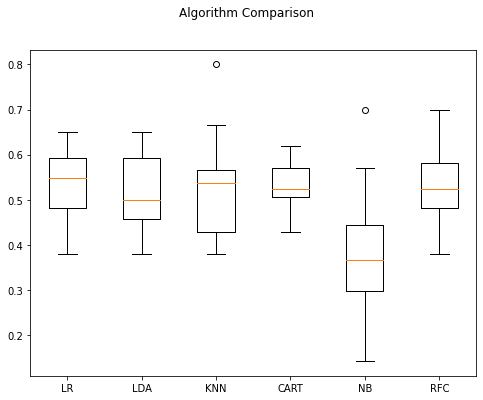

In [36]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()